In [1]:
# import statements
import utils
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [6]:
# Loading data

# Fake data
articles = np.asarray([
    ["Donald Trump buys a dog", "Donald Trump recently was found buying a dog"],
    ["President Trump gets a corgie", "The White House welcomes a new furry friend, and its name is Evan!"],
    ["U.S. Presidential Paws", "You won't believe the new dog that Donald and the fam just got!"],
    ["Biden sells his old car", "President Biden just announced that he is selling is '96 Civic"],
    ["President Biden to sell car", "Biden announced via Twitter that he will indeed be selling his car"],
    ["Biden getting that car cash", "Biden is about to cash out once he sells that junker civic!"]
])

data = utils.toframe(utils.files)[0:100]

In [8]:
data.head()

,article_id,title,abstract,author,source,time_stamp,link,query
0,350574907028843665,"F.D.A. Clears Johnson & Johnson’s Shot, the Th...",The authorization of a third Covid-19 vaccine ...,By Noah Weiland and Sharon LaFraniere,The New York Times,2021-02-27T23:12:09+0000,https://www.nytimes.com/2021/02/27/health/covi...,NaN
1,-5264401578883776690,New Findings on 2 Ways Children Become Serious...,A large study found that young people hospital...,By Pam Belluck,The New York Times,2021-02-24T21:32:35+0000,https://www.nytimes.com/2021/02/24/health/covi...,NaN
2,8687862899096079994,"On the Post-Pandemic Horizon, Could That Be … ...","Signs of economic life are picking up, and mou...",By Ben Casselman,The New York Times,2021-02-21T20:00:08+0000,https://www.nytimes.com/2021/02/21/business/ec...,NaN
3,1228956229975943415,2.5 Million Women Left the Work Force During t...,"“In one year,” Vice President Kamala Harris sa...",By Katie Rogers,The New York Times,2021-02-18T22:50:57+0000,https://www.nytimes.com/2021/02/18/us/politics...,NaN
4,5922339958182105065,"Covid Vaccines for Kids Are Coming, but Not fo...",Pfizer and Moderna are testing their vaccines ...,By Apoorva Mandavilli,The New York Times,2021-02-12T10:00:21+0000,https://www.nytimes.com/2021/02/12/health/covi...,NaN


In [15]:
# # Vectorizing 
# # Combining headlines and bodies
# a = [x[0] + ': ' + x[1] for x in articles]
# # Generating model 
# roberta = SentenceTransformer('stsb-roberta-base')
# v = utils.encode(a, roberta)

roberta = SentenceTransformer('stsb-roberta-base')
a = [x + ': ' + y for x,y in zip(data['title'], data['abstract'])]
v = utils.encode(a, roberta)

Time for computting embeddings:28.74394392967224


In [120]:
# Creating the graph
import networkx as nx

G = nx.Graph()

In [127]:
G.clear()
for root, v0 in zip(data['title'], v):
    for comp, v1 in zip(data['title'], v):
        if utils.doc_sim(v0,v1) > .5:
            G.add_edge(root, comp, weight=utils.doc_sim(v0,v1))

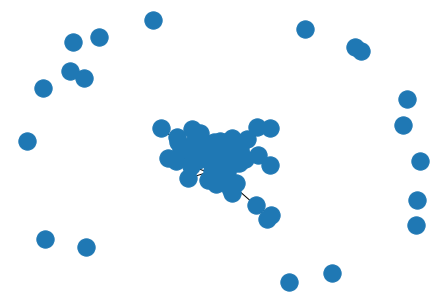

In [128]:
nx.draw(G)

In [129]:
from networkx.algorithms import community
from networkx import edge_betweenness_centrality as betweenness

def most_central_edge(G):

    centrality = betweenness(G, weight="weight")

    return max(centrality, key=centrality.get)

comp = community.girvan_newman(G, most_valuable_edge=most_central_edge)

tuple(sorted(c) for c in next(comp))

(['A Covid Vaccine Side Effect, Enlarged Lymph Nodes, Can Be Mistaken for Cancer',
  'A Dismal Spring Awaits Unless We Slow the Spread of Covid-19',
  'A French Nun Turns 117 After Knocking Down Covid-19',
  'Another antibody therapy is authorized for high-risk Covid-19 patients.',
  'Answers to All Your Questions About Getting Vaccinated for Covid-19',
  'As Brazil faces record Covid-19 deaths, a variant-fueled surge and lagging vaccinations, Bolsonaro disparages masks.',
  'Australia Begins Covid-19 Vaccination Campaign',
  'Because of Covid-19, Even Getting to the Australian Open Is a Battle',
  'Behind the Lines of Britain’s Covid War',
  'Biden administration officials tried to tamp down expectations for supplies of the Johnson & Johnson vaccine.',
  'Boris Johnson Says Brazilian Coronavirus Variant Is Not a Threat',
  'Brazil Is Brilliant at Vaccinations. So What Went Wrong This Time?',
  'C.D.C. Traces Covid Outbreaks in Gyms, Urging Stricter Precautions',
  'California has now 